In [48]:
%matplotlib inline
import scipy.integrate as integrate # get the ODE module
import matplotlib.pyplot as plt # plotting module
import numpy as np # numpy module

import matplotlib.pylab as pylab

# Week 6 Solving Initial Value ODEs

## Part 2: Coupled and Higher Order ODEs


Many problems in Geosciences can be written in the form of
differential equations. 

This session aims to introduce you to basic ideas about numerically
solving Ordinary Differential Equations (ODEs) and implementing these in Python.



---
# 3. Numerical solution of Coupled ODEs

 The equation $\frac{dy}{dt}=f(y,t)$ can be generalized to a vector:
  $\frac{d\mathbf{y}}{dt}=\mathbf{f}(\mathbf{y},t)$.   

  An example is the coupled problem:
  
  $$\frac{dy}{dt}=-x$$
  
  $$\frac{dx}{dt}=y$$

with initial conditions $x(t=0)=1 \mbox{ and } y(t=0)=0$.  

  
This can be re-written within a vector form, 

Let $z_1 = x$ and $z_2=y$

and $\mathbf{z} =  \begin{pmatrix}z_1 \\ z_2  \end{pmatrix}$

Therefore:
  $$\mathbf{\dot{z}} =  \begin{pmatrix}\dot{z_1} \\ \dot{z_2}  \end{pmatrix} =  \begin{pmatrix}z_2 \\ -z_1 \end{pmatrix}$$

<div class="alert alert-block alert-info"> **IMPORTANT:** Convince yourself that this vector equation for $\mathbf{z}$ is equivalent to the 2 coupled equations for $x,y$ and $t$ above.
</div>

(<matplotlib.text.Text at 0x119c70940>, <matplotlib.text.Text at 0x119cd56a0>)

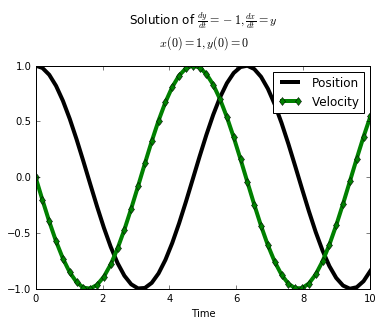

In [55]:
### Python code to solve coupled pair of ODEs:
###  dy/dt=-x &  dx/dt=y; with initial conditions x=1 y=0

# 1. Define the function f(y,t) that describes the derivative
def derivative(z,t):
  """ Derivative (dz[0]/dt,dz[1]/dt)=(z[1],-z[0])"""
  return (z[1],-z[0])

# 2. Set the evaluation timesteps and initial condition
time=np.linspace(0,10)
y0 = np.array([1,0])

# 3. Use odeint to solve the problem
z = integrate.odeint(derivative, y0, time) 

# 4. Plot the results
plt.plot(time, z[:,0],'k' , linewidth=4)
plt.plot(time,z[:,1],'-gd', linewidth=4)
plt.legend(('Position','Velocity'))
plt.title(r'Solution of $\frac{dy}{dt}=-1, \frac{dx}{dt}=y$' "\n"
    r' $x(0)=1, y(0)=0$'"\n"), plt.xlabel('Time')

### 3.1 We can also extract diagnostic information `integrate.odeint(... full_output=True)`

infodict : dict, only returned if full_output == True
    Dictionary containing additional output information

    =======  ============================================================
    key      meaning
    =======  ============================================================
    'hu'     vector of step sizes successfully used for each time step.
    'tcur'   vector with the value of t reached for each time step.
             (will always be at least as large as the input times).
    'tolsf'  vector of tolerance scale factors, greater than 1.0,
             computed when a request for too much accuracy was detected.
    'tsw'    value of t at the time of the last method switch
             (given for each time step)
    'nst'    cumulative number of time steps
    'nfe'    cumulative number of function evaluations for each time step
    'nje'    cumulative number of jacobian evaluations for each time step
    'nqu'    a vector of method orders for each successful step.
    'imxer'  index of the component of largest magnitude in the
             weighted local error vector (e / ewt) on an error return, -1
             otherwise.
    'lenrw'  the length of the double work array required.
    'leniw'  the length of integer work array required.
    'mused'  a vector of method indicators for each successful time step:
             1: adams (nonstiff), 2: bdf (stiff)
    =======  ============================================================


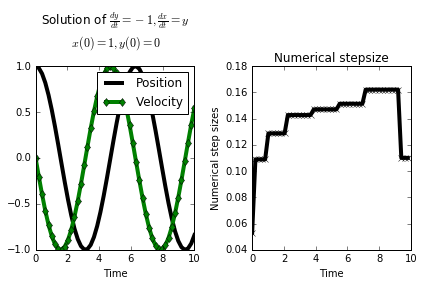

In [56]:
y0 = np.array([1,0])

## Full_output=True means we get some helpful information on the solver. 
y,info = integrate.odeint(derivative, y0, time, full_output=True) 

## Then plot the results
plt.subplot(1,2,1)
plt.plot(time, z[:,0],'k' , linewidth=4)
plt.plot(time,z[:,1],'-gd', linewidth=4)
plt.legend(('Position','Velocity'))
plt.title(r'Solution of $\frac{dy}{dt}=-1, \frac{dx}{dt}=y$' "\n"
    r' $x(0)=1, y(0)=0$'"\n"), plt.xlabel('Time')

# plot the Delta_t for each time range
plt.subplot(1,2,2)

plt.plot(time[0:-1],info['hu'],'k-x',linewidth=4)

plt.title("Numerical stepsize")
plt.xlabel('Time'), plt.ylabel('Numerical step sizes')
plt.tight_layout()

---

# 4. Numerical Solution of 2nd order ODEs by creating coupled 1st order ODEs

Before we start with a new example, consider the coupled problem we solved above:

  $$\frac{dy}{dt}=-x$$
  
  $$\frac{dx}{dt}=y$$

Substitute the second equation in the first to eliminate $y$:
 $$\frac{dy}{dt}= \frac{d^2x}{dt^2} =-x$$
 
 Similarly, if we eliminate $x$:
 $$\frac{d^2y}{dt^2} =-y$$
 
So in actual fact, these coupled equations can equivalently expressed as 2nd order ODEs!
 
In this Section, we go the other way where we start with a higher order ODE, reformulate as a set of coupled ODEs and then solve with `odeint`.

## 4.1 EXAMPLE: Numerical solution to a damped simple harmonic oscillator

Solve the second order ODE:

$$\ddot{y} +2\dot{y} +2y = \cos(2x)$$

with boundary conditions $y \, (x=0)=0$ and $\dot{y} \, (x=0)=0$

- We can turn this into two coupled first-order equations by defining a new dependent variable:

Let
$$z = \frac{dy}{dx} = \dot{y}$$ 
therefore 
$$\dot{z} +2z +2y = \cos(2x)$$

$$\dot{z} = \cos(2x)- 2z - 2y$$

<div class="alert alert-block alert-info"> **IMPORTANT:** Convince yourself that this vector equation for $\mathbf{U}$ is equivalent to the 2 coupled equations for $z,y$ and $t$ above.
</div>

Let 
$$\mathbf{U} = \begin{pmatrix} y \\ z \end{pmatrix}$$

Therefore, the derivative is:
  $$\mathbf{\dot{U}} =  \begin{pmatrix}\dot{y} \\ \dot{z}  \end{pmatrix} =  \begin{pmatrix}z \\ \cos(2x)- 2z - 2y \end{pmatrix} =  \begin{pmatrix} U[1] \\ \cos(2x)- 2 U[0] - 2 U[1] \end{pmatrix}$$


with the two initial boundary conditions $$y\, (x=0)=0$$ and $$\dot{y}\, (x=0)=z\, (x=0)=0$$ 

So, we now have a set of coupled ODEs and if we can integrate $\mathbf{\dot{U}}$ over $x$, we will find $\mathbf{U}$ as a function of position, $x$, which gives us $U[0]=y(x)$ and $U[1]=z=\dot{y}(x)$

<div class="alert alert-block alert-info"> **IMPORTANT:** Convince yourself that this vector equation for $\mathbf{U}$ is equivalent to the 2 coupled equations for $z,y$ and $t$ above.
</div>

- We can solve this system of ODEs using odeint!

In [58]:
def dU_dx(U, x):
    # Here U is a vector such that y=U[0] and z=U[1]. This function should return [y', z']
    return [U[1], -2*U[1] - 2*U[0] + np.cos(2*x)]

U0 = [0, 0]

x = np.linspace(0, 10, 200)
U = integrate.odeint(dU_dx, U0, x)

# Extract results for plotting
y = U[:,0]
dy_dt = U[:,1]

plt.plot(x,y, label="Position, y")
plt.plot(x, np.cos(2*x), label="Forcing, cos(2x)")
plt.plot(x,dy_dt, label="Velocity, dy/dt")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Damped forced harmonic oscillator");
plt.legend()

---

# 5. EXERCISES: Coupled and Higher Order ODEs

---

## 5.1 Exercise : Solving coupled equations with `odeint`

We will have a look at the Lotka-Volterra model, also known as the predator-prey equations, which is a pair of first order, non-linear, differential equations frequently used to describe the dynamics of biological systems in which two species interact, one a predator and the other its prey. The model was proposed independently by Alfred J. Lotka in 1925 and Vito Volterra in 1926, and can be described by.

$$\frac{du}{dt} = a \times u - b \times u \times v$$
$$\frac{dv}{dt} = -c \times v + d \times b \times u \times v$$

Where, 

- $u$: number of preys (for example, rabbits)
- $v$: number of predators (for example, foxes)
- $a, b, c, d$ are constant parameters defining the behavior of the population:
    - $a = 1.$ is the natural growing rate of rabbits, when there's no fox
    - $b = 0.1$ is the natural dying rate of rabbits, due to predation
    - $c = 1.5$ is the natural dying rate of fox, when there's no rabbit
    - $d = 0.75$ is the factor describing how many caught rabbits let create a new fox
    
To specify these coupled equations lets use `X=[u,v]`. This is what we want to find by integrating forwards from some known starting population - i.e. the population fo foxes and hares with time.

- First you need to create a function to return the derivative of `X`below, which we know analytically. 

In [ ]:
# Definition of parameters
a = 
b = 
c = 
d = 

def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array( ,
                  )

In [68]:
## ANSWER

# Definition of parameters
a = 1.
b = 0.1
c = 1.5
d = 0.75

def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    du_dt = a*X[0] -   b*X[0]*X[1]
    dv_dt = -c*X[1] + d*b*X[0]*X[1]
    return np.array([ du_dt ,dv_dt ])

- Now specify the timerange you want to integrate over and the initial conditions

In [69]:
t = np.linspace(0, 15,  1000)              # time
X0 = np.array([10, 5])                     # initials conditions: 10 rabbits and 5 foxes

- Now integrate forward from this initial starting point using `odeint`

In [ ]:
X, infodict = integrate.odeint(, , , full_output=True)
infodict['message']                     # >>> 'Integration successful.'

In [70]:
## ANSWER
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']                     # >>> 'Integration successful.'

'Integration successful.'

- The code below should plot the results

In [71]:
rabbits, foxes = X.T

plt.plot(t, rabbits, 'r-', label='Rabbits')
plt.plot(t, foxes  , 'b-', label='Foxes')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')

- An alternative plot

In [72]:
plt.plot(foxes, rabbits, 'r-', label='Rabbits')
plt.xlabel("Foxes")
plt.ylabel("Rabbits")

For more information see http://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html

---

## 5.2 EXERCISE: Solving higher order ODEs with `odeint` - Chaotic Driven Pendulum

The second order differential equation for the angle theta of a pendulum acted on by gravity with friction can be written:

$$\theta''(t) + b\theta'(t) + c\sin(\theta(t)) = 0$$

where $b=0.25$ and $c=5$ are positive constants, and a prime (‘) denotes a derivative. 

Solve this equation with odeint, by first converting it to a system of first order coupled equations by defining the angular velocity $\omega(t) = \theta'(t)$.

Integrate over the time range from 0 to 10.

Use the initial conditions that:
$$\theta(t=0)=\pi-0.1$$

and

$$\omega(t) = \theta'(t=0)=0.0$$

<div class="alert alert-block alert-success">

<p> ANSWER https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.integrate.odeint.html

<p> By defining the angular velocity $\omega(t) = \theta'(t)$, we obtain the system:

$$\theta'(t) = \omega(t)$$
$$\omega'(t) = -b\omega(t) - c\sin(\theta(t))$$
<p>Let `y` be the vector $[\theta, \omega]$. We implement this system in python as:

</div>

In [73]:
## ANSWER

b = 0.25
c = 5.0

def pend(y, t):
    dTheta_dt = y[1]
    dOmega_dt = -b*y[1] - c*np.sin(y[0])
    return [dTheta_dt, dOmega_dt]
    
y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 10, 101)

sol = integrate.odeint(pend, y0, t)

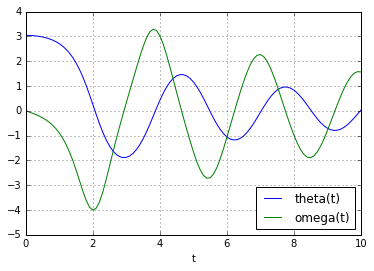

In [74]:
## ANSWER

plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()

---

## 5.3 EXERCISE: Solving higher order ODEs

Solve

$$\ddot{y} + (0.9+0.7t)\dot{y} + Ky = 0$$

Over the range $t=0$ to $2$, with $K=30$.

And with the initial conditions:

$$y(t=0) = 2$$
$$\dot{y}(t=0)=-1$$

<div class="alert alert-block alert-success">

SOLUTION

<p>See: https://apmonitor.com/wiki/index.php/Apps/2ndOrderDifferential

<p>- Let $z = \dot{y}$

<p>- Therefore
$$\dot{z} + (0.9+0.7t)z + Ky = 0$$

<p>where

$$y(t=0) = 2$$
$$z(t=0)=-1$$

</div>

In [75]:
## ANSWER

# Definition of parameters
K = 30.

def dU_dt(U, t):
    return np.array([ U[1] , -K*U[0]-(0.9+0.7*t)*U[1] ])

U0 = [2, -1]

t = np.linspace(0, 2, 100)
U = integrate.odeint(dU_dt, U0, ts)

# Extract results for plotting
y = U[:,0]
dy_dt = U[:,1]

plt.plot(t,y, label="y")
plt.plot(t,dy_dt, label="dy/dt")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()

---

## 5.4 Example Exam Question

The response, $z$, of a seismograph to acceleration, $f(t)$, can be written as:
$$\frac{d^2z}{dt^2}+2\eta\frac{dz}{dt}+\omega_0^2z=f(t)$$

where the constant $\eta$ is the damping factor and the constant $\omega_0$ is the natural frequency of the seismometer.

1. Why does this equation need to be converted to a set of coupled ODEs if we are to use `scipy.integrate.odeint` to integrate it?

2. Convert this equation to a set of coupled ODEs and indicate how you would solve it in Python by integrating over the domain $t \in [0,20]$ with initial conditions $z(t=0)=\frac{dz}{dt}(t=0)=0$.

3. Outline how you would explore using Python how the response varies for different values of $\eta$ and $\omega_0$ when the forcing function takes the form:

$f(t)= 1$ for $0<t<1$

and $f(t)= 0$ otherwise

